In [1]:
import numpy as np
import pandas as pd

In [126]:
#words_clean = pd.read_csv("google-10000-english-usa-no-swears.txt", header=None).iloc[:, 0].values.astype(str)
#words_common = pd.read_csv("count_1w.txt", header=None, sep = '\t').iloc[:, 0].values.astype(str)
words_all = pd.read_csv("collins2019.txt").iloc[:, 0].values.astype(str)
words_all = np.array([w.lower() for w in words_all])

In [296]:
length = 6

In [297]:
#wc = np.array([w for w in words_common2 if len(w) == length])
wa = np.array([w for w in words_all if len(w) == length])
#war = wa[::-1]

In [298]:
# filter positional kgrams
k = 3
positional_kgrams = []

for i in range(length):
    positional_kgrams.append({})

for w in wa:
    # check if w collides with any trigram
    flag = True
    for i in range(length):
        gram = (w+w)[i:(i+k)]
        if gram in positional_kgrams[i].keys():
            positional_kgrams[i][gram] = positional_kgrams[i][gram] + 1
        else:
            positional_kgrams[i][gram] = 1

In [299]:
counts = []

# sort words by most common kgram
for w in wa:
    count = 0
    for i in range(length):
        gram = (w+w)[i:(i+k)]
        count = count+ positional_kgrams[i][gram]
    counts.append(count)

In [300]:
ws = wa[np.argsort(counts)]

In [301]:
positional_kgrams = []
wc_uniq = []
k=3
for i in range(length):
    positional_kgrams.append({})

for w in ws:
    # check if w collides with any trigram
    flag = True
    for i in range(length):
        gram = (w+w)[i:(i+k)]
        if gram in positional_kgrams[i].keys():
            flag = False
    if flag:
        wc_uniq.append(w)
        # add w to list and add kgrams to dicts
        for i in range(length):
            gram = (w+w)[i:(i+k)]
            positional_kgrams[i][gram] = 1

In [302]:
len(wc_uniq)

1378

In [303]:
wc_uniq[1000:]

['gelosy',
 'ardebs',
 'bajree',
 'lipase',
 'juliet',
 'meteor',
 'suffix',
 'zimbis',
 'durocs',
 'endoss',
 'flense',
 'flugel',
 'kurvey',
 'minyan',
 'brahma',
 'kreese',
 'yarfas',
 'turbot',
 'shogun',
 'knight',
 'nizams',
 'outbuy',
 'misfit',
 'cresyl',
 'byzant',
 'quirky',
 'debark',
 'reheel',
 'kereru',
 'zeatin',
 'krafts',
 'wirrah',
 'oxgang',
 'pudsey',
 'aarrgh',
 'pedlar',
 'nardoo',
 'jovial',
 'baseej',
 'skiddy',
 'annoys',
 'ribald',
 'iambus',
 'shrewd',
 'instar',
 'goutte',
 'noulde',
 'secede',
 'soigne',
 'jnanas',
 'cutesy',
 'sheqel',
 'chokri',
 'reavow',
 'snoozy',
 'blithe',
 'imaums',
 'kotare',
 'curfew',
 'hitchy',
 'viator',
 'troppo',
 'meekly',
 'mixups',
 'whelky',
 'ocreas',
 'nuggar',
 'feoffs',
 'haemin',
 'desalt',
 'spredd',
 'kharif',
 'answer',
 'ungula',
 'asdics',
 'ionize',
 'rebody',
 'racino',
 'hanjar',
 'frizzy',
 'ashore',
 'unwont',
 'torpor',
 'audads',
 'vifdas',
 'cupric',
 'qulliq',
 'favela',
 'brekky',
 'soneri',
 'nautch',

In [304]:
pd.DataFrame({'words': wc_uniq}).to_csv('collins_len%i.csv' % length)

In [305]:
pd.DataFrame({'words': np.sort(wc_uniq)}).to_csv('collins_len%i_sorted.csv' % length)

In [306]:
pd.DataFrame({'words': np.sort(wc_uniq[:1000])}).to_csv('collins_len%i_1k_sorted.csv' % length)

## Shuffle ints by sorting words by substring

In [307]:
wlist = np.sort(wc_uniq[:1000])

In [308]:
wlist[0:5]

array(['abattu', 'abbacy', 'abitur', 'ablaze', 'abrazo'], dtype='<U6')

In [309]:
from matplotlib import pyplot as plt

In [310]:
i = 1
order = np.argsort(np.array([w[i:] + w[:i] for w in wlist]))

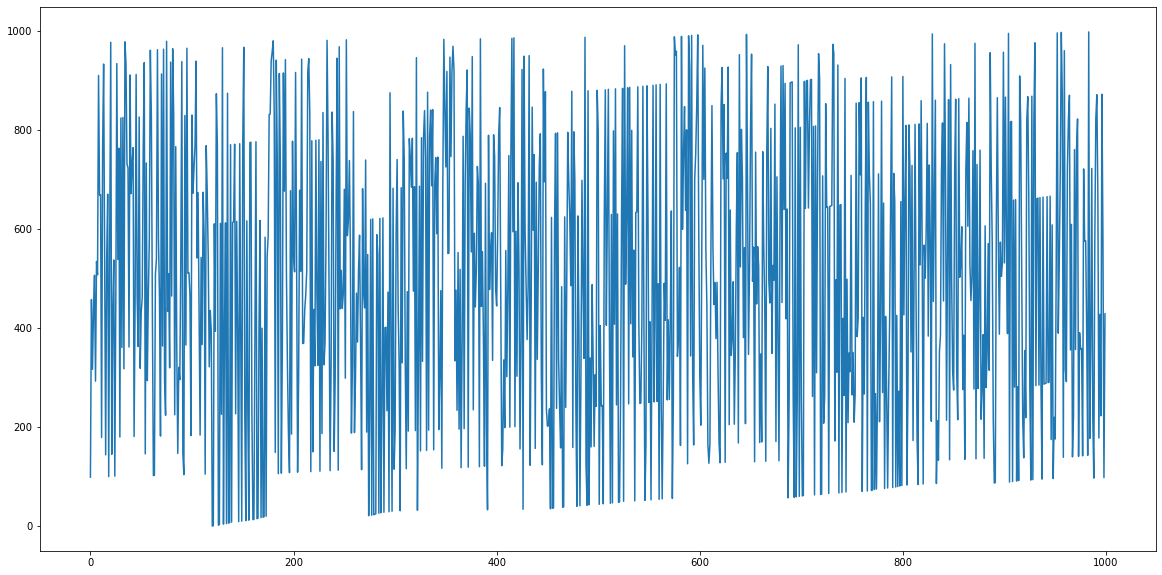

In [311]:
plt.figure(figsize=(20,10))
plt.plot(order)

In [312]:
wlist[order]

array(['baalim', 'kabaya', 'gabbro', 'jabiru', 'labneh', 'facete',
       'macoya', 'lactam', 'vacuum', 'paczki', 'padauk', 'dadbod',
       'saddhu', 'wadmol', 'madtom', 'caduac', 'maenad', 'paesan',
       'baetyl', 'naevus', 'zaffre', 'cafila', 'jaghir', 'maglev',
       'bagnio', 'kagoul', 'wagyus', 'mahewu', 'sahiba', 'dahlia',
       'tahsil', 'haiduk', 'taihoa', 'gaijin', 'zaikai', 'wairua',
       'raiyat', 'qajaqs', 'hajjah', 'vakass', 'pakeha', 'rakija',
       'sakkoi', 'dakoit', 'kakuro', 'valkyr', 'kalpac', 'halutz',
       'talweg', 'galyak', 'jamaat', 'kameez', 'samfoo', 'wampum',
       'camsho', 'ramtil', 'famuli', 'kanban', 'nanobe', 'yanqui',
       'tanrec', 'jansky', 'banzai', 'baobab', 'laogai', 'maomao',
       'yaourt', 'napalm', 'kapeek', 'daphne', 'vapory', 'hapuku',
       'yaqona', 'faquir', 'earbud', 'zareba', 'jargon', 'larnax',
       'garuda', 'wasabi', 'kasbah', 'yasmak', 'tatami', 'eathly',
       'satnav', 'hatpeg', 'catsup', 'gatvol', 'fatwah', 'matz